In [ ]:
'''
Problem statement
'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("creditcard.csv")
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

<Axes: xlabel='Amount', ylabel='Density'>

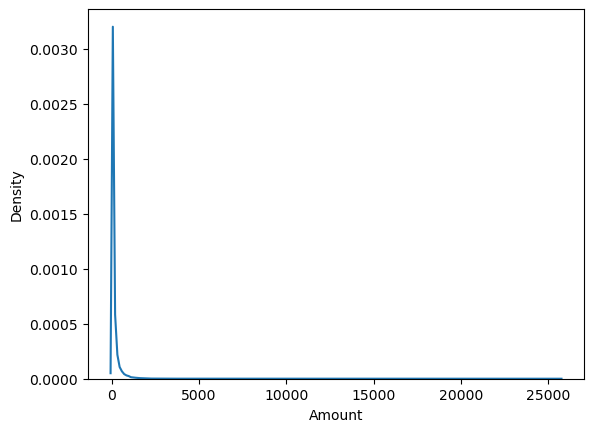

In [6]:
sns.kdeplot(df["Amount"])

<Axes: ylabel='Amount'>

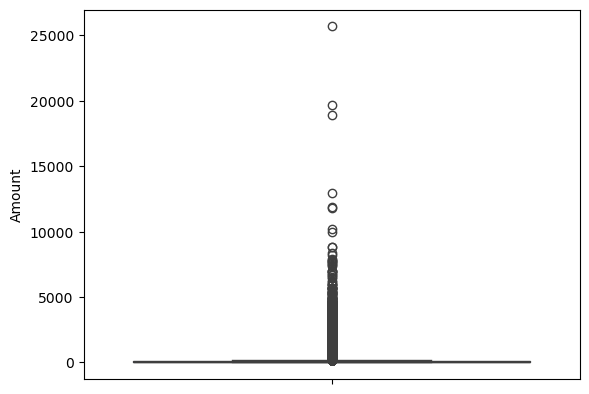

In [7]:
sns.boxplot(df["Amount"])

In [8]:
df["Class"].value_counts()
# Highly imbalanced data available for us.

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
valid=df[df["Class"]==0]
fraud=df[df["Class"]==1]

In [10]:
valid.shape

(284315, 31)

In [11]:
fraud.shape

(492, 31)

In [15]:
# undersampling for valid transactions
# because 492 rows of fraud is available , 492 rows of valid is selected
valid=valid.sample(492)

In [16]:
new_df=pd.concat([valid,fraud],ignore_index=1)
new_df.shape

(984, 31)

In [17]:
new_df["Class"].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [18]:
features=new_df.drop(["Time","Class"],axis=1)
target=new_df["Class"]

In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.20, random_state=0)

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [21]:
def mymodel(model):
    model.fit(xtrain,ytrain) #
    ypred=model.predict(xtest)
    # checking for overfitting underfitting
    print(f"Training score : {model.score(xtrain,ytrain)}")
    print(f"Testing score : {model.score(xtest,ytest)}")
    c=pd.DataFrame(confusion_matrix(ytest,ypred),index=["valid","fraud"],
              columns=["valid","fraud"])
    print(f"Confusion Matrix : \n{c}")
    print("Classification Report : \n",classification_report(ytest,ypred))
    return model

In [29]:
mymodel(LogisticRegression())

Training score : 0.951715374841169
Testing score : 0.949238578680203
Confusion Matrix : 
       valid  fraud
valid     89      2
fraud      8     98
Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        91
           1       0.98      0.92      0.95       106

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



LogisticRegression()

In [26]:
# to deal with overfitting apply pruning techniques 
parameters={
    "n_estimators":[60,90,150],
    "max_depth":list(range(1,4)), # 1,2,3
    "min_samples_split":list(range(1,4)), # 1,2,3
    "min_samples_leaf":list(range(2,4)) # 2,3
}

In [27]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(RandomForestClassifier(),parameters,verbose=2)
clf.fit(xtrain,ytrain)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=1, n_estimators=60; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=1, n_estimators=60; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=1, n_estimators=60; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=1, n_estimators=60; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=1, n_estimators=60; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=1, n_estimators=90; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=1, n_estimators=90; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=1, n_estimators=90; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=1, n_estimators=90; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_s

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [60, 90, 150]},
             verbose=2)

In [28]:
c=mymodel(clf.best_estimator_)
c

Training score : 0.9440914866581956
Testing score : 0.9137055837563451
Confusion Matrix : 
       valid  fraud
valid     90      1
fraud     16     90
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.99      0.91        91
           1       0.99      0.85      0.91       106

    accuracy                           0.91       197
   macro avg       0.92      0.92      0.91       197
weighted avg       0.92      0.91      0.91       197



RandomForestClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=60)